In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sustainable-lifestyle-rating-dataset/lifestyle_sustainability_data.csv


# **Import**

In [8]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & EDA**

In [9]:
df = pd.read_csv('/kaggle/input/sustainable-lifestyle-rating-dataset/lifestyle_sustainability_data.csv')

**Data Description**
* **ParticipantID: A unique identifier for each participant.**
* **Age: The age of the participant.**
* **Location: The location of the participant (Urban, Suburban, or Rural).**
* **DietType: The dietary preference of the participant (Mostly Plant-Based, Balanced, or Mostly Animal-Based).**
* **LocalFoodFrequency: How often the participant consumes locally sourced food (Often, Sometimes, or Rarely).**
* **TransportationMode: The primary mode of transportation used by the participant (Bike, Public Transit, Car, or Walk).**
* **EnergySource: The primary source of energy used in the participant's home (Renewable, Mixed, or Non-Renewable).**
* **HomeType: The type of dwelling the participant lives in (Apartment or House).**
* **HomeSize: The size of the participant's home in square feet.**
* **ClothingFrequency: How often the participant purchases new clothing (Often, Sometimes, or Rarely).**
* **SustainableBrands: Whether the participant prioritizes purchasing from sustainable brands (True or False).**
* **EnvironmentalAwareness: A rating (1-5) indicating the participant's level of environmental awareness.**
* **CommunityInvolvement: The participant's level of involvement in their community (High, Moderate, or Low).**
* **MonthlyElectricityConsumption: The participant's average monthly electricity consumption in kilowatt-hours.**
* **MonthlyWaterConsumption: The participant's average monthly water consumption in gallons.**
* **Gender: The gender of the participant (Male, Female, or Non-Binary).**
* **UsingPlasticProducts: How often the participant uses plastic products (Often, Sometimes, or Rarely).**
* **DisposalMethods: The primary method the participant uses to dispose of waste (Composting, Recycling, Landfill, or Combination).**
* **PhysicalActivities: The participant's level of physical activity (High, Moderate, or Low).**
* **Rating: The overall sustainability rating assigned to the participant (1-5).**

In [10]:
df.shape

(499, 20)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ParticipantID                  499 non-null    int64 
 1   Age                            499 non-null    int64 
 2   Location                       499 non-null    object
 3   DietType                       499 non-null    object
 4   LocalFoodFrequency             499 non-null    object
 5   TransportationMode             499 non-null    object
 6   EnergySource                   499 non-null    object
 7   HomeType                       499 non-null    object
 8   HomeSize                       499 non-null    int64 
 9   ClothingFrequency              499 non-null    object
 10  SustainableBrands              499 non-null    bool  
 11  EnvironmentalAwareness         499 non-null    int64 
 12  CommunityInvolvement           381 non-null    object
 13  Month

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ParticipantID,499.0,250.024048,144.233925,1.0,125.5,250.0,374.5,500.0
Age,499.0,44.052104,14.904828,18.0,31.0,44.0,58.0,96.0
HomeSize,499.0,1518.046092,672.212235,407.0,951.5,1450.0,1995.0,2997.0
EnvironmentalAwareness,499.0,3.062124,1.342145,1.0,2.0,3.0,4.0,5.0
MonthlyElectricityConsumption,499.0,291.963928,120.482275,55.0,185.0,295.0,400.0,498.0
MonthlyWaterConsumption,499.0,3139.521042,1224.609306,536.0,2000.0,3350.0,4100.0,5250.0
Rating,499.0,3.430862,1.502585,1.0,2.0,4.0,5.0,5.0


**Missing Value Check**

In [13]:
df.isnull().sum()

ParticipantID                      0
Age                                0
Location                           0
DietType                           0
LocalFoodFrequency                 0
TransportationMode                 0
EnergySource                       0
HomeType                           0
HomeSize                           0
ClothingFrequency                  0
SustainableBrands                  0
EnvironmentalAwareness             0
CommunityInvolvement             118
MonthlyElectricityConsumption      0
MonthlyWaterConsumption            0
Gender                             0
UsingPlasticProducts               0
DisposalMethods                    0
PhysicalActivities               108
Rating                             0
dtype: int64

**Duplicated value check**

In [14]:
df.duplicated().sum()

0

In [15]:
df.head()

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


# **2. Data Transform for Visualization**

In [16]:
df['CommunityInvolvement'].fillna('Miss', inplace=True)
df['PhysicalActivities'].fillna('Miss', inplace=True)

**Data Check**

In [17]:
df.isnull().sum()

ParticipantID                    0
Age                              0
Location                         0
DietType                         0
LocalFoodFrequency               0
TransportationMode               0
EnergySource                     0
HomeType                         0
HomeSize                         0
ClothingFrequency                0
SustainableBrands                0
EnvironmentalAwareness           0
CommunityInvolvement             0
MonthlyElectricityConsumption    0
MonthlyWaterConsumption          0
Gender                           0
UsingPlasticProducts             0
DisposalMethods                  0
PhysicalActivities               0
Rating                           0
dtype: int64

In [18]:
df.head()

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


# **3. Data Visualization**

In [19]:
num_cols = df.select_dtypes(include = ['int64','float64']).drop(columns=['ParticipantID']).columns
cat_cols = df.select_dtypes(exclude = ['int64','float64']).columns

## **Histogram**

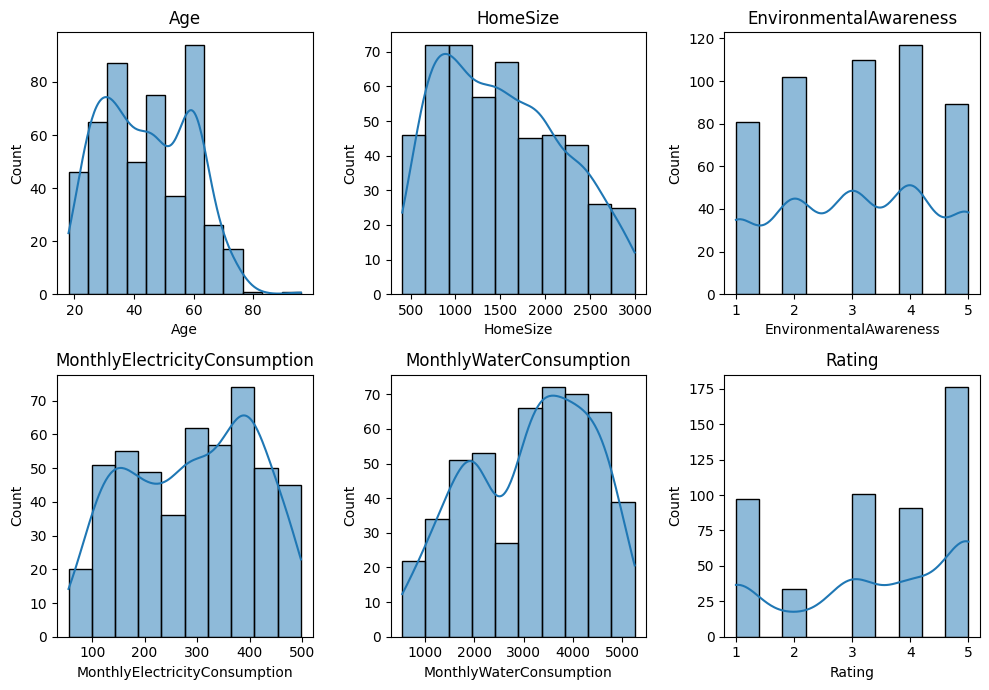

In [20]:
f, ax = plt.subplots(2,3 , figsize=(10, 7))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data= df, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

## **Boxplot**

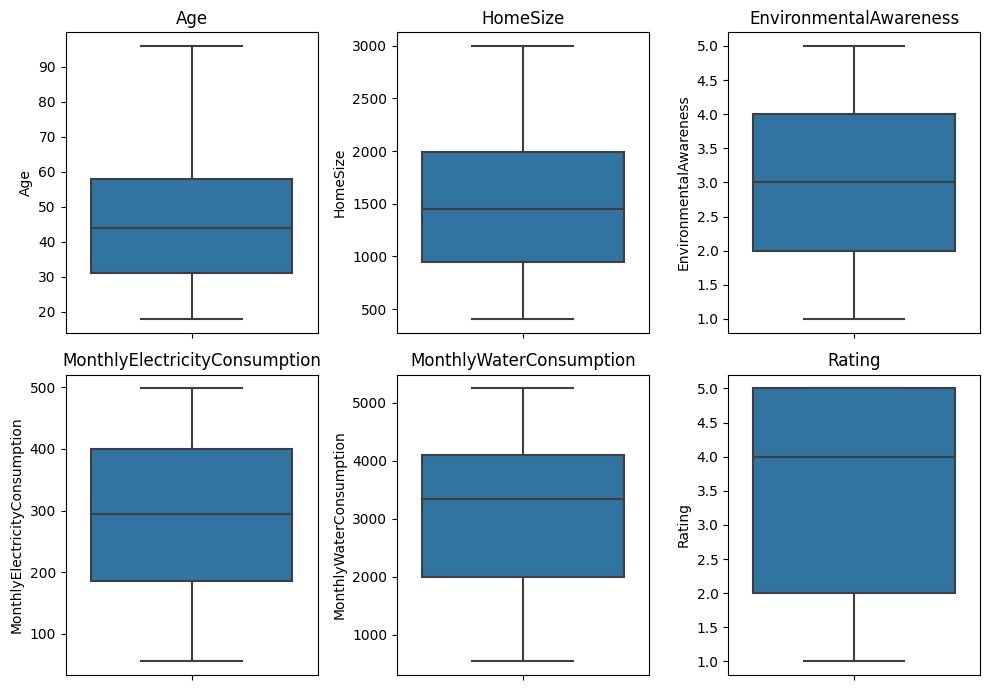

In [21]:
f, ax = plt.subplots(2,3 , figsize=(10, 7))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(data= df, y= cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

## **CountPlot**

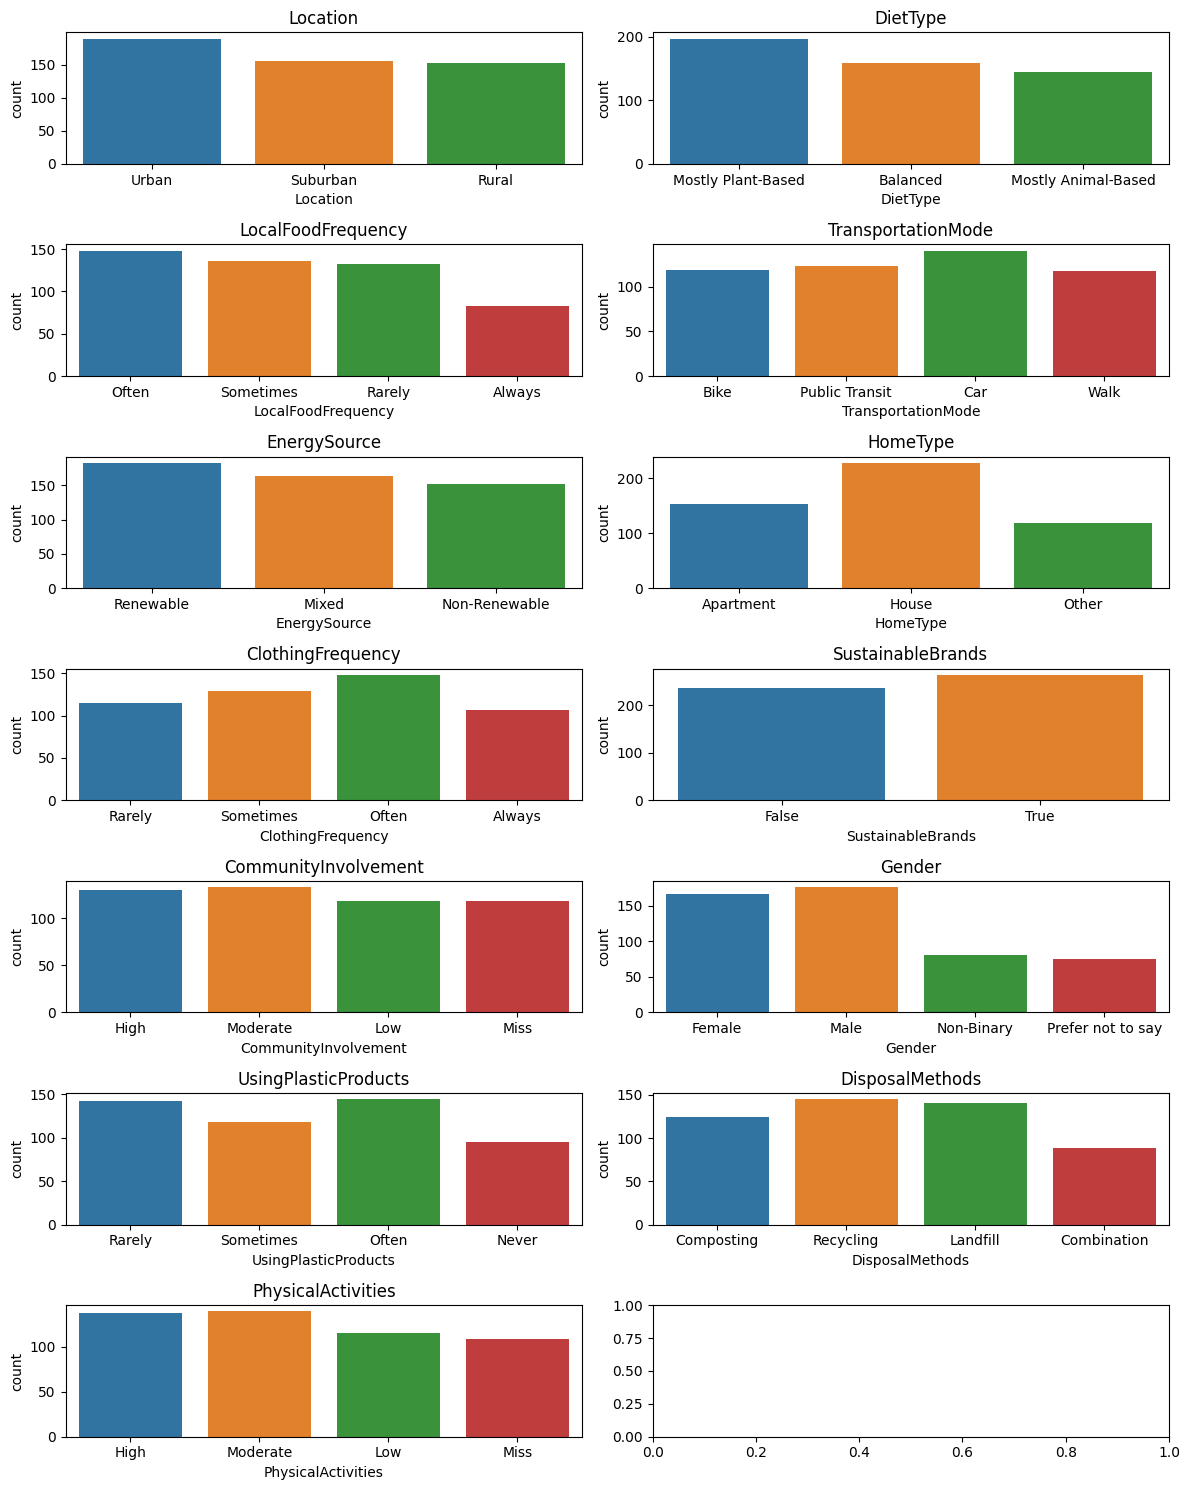

In [22]:
f, ax = plt.subplots(7,2 , figsize=(12, 15))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data= df, x= cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

## **Correlation**

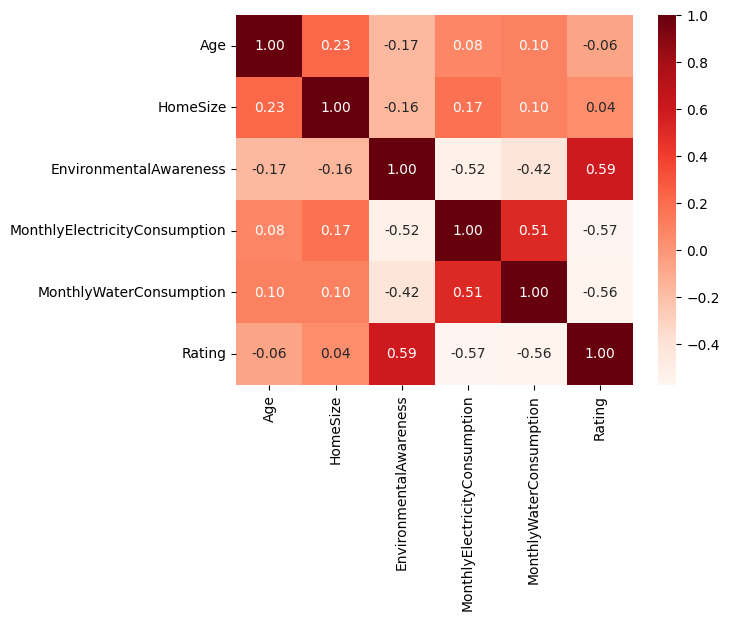

In [23]:
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

# **4. Modeling**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

## **Preprocessing**

In [25]:
df.drop(columns=['ParticipantID'], inplace=True)

## **Label Encoding**

In [26]:
cat_cols = df.select_dtypes(exclude = ['int64','float64']).columns
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [27]:
df.head()

,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,35,2,2,1,0,2,0,800,2,1,5,0,100,1500,0,2,1,0,5
1,28,1,0,3,2,0,1,1500,3,1,4,3,250,3000,1,3,3,3,4
2,65,0,1,2,1,1,1,2500,1,0,2,1,400,4500,1,1,2,1,1
3,42,2,2,1,3,2,0,950,3,1,4,3,150,2000,0,2,3,0,5
4,31,1,0,3,2,0,1,1800,1,1,3,1,300,3500,2,3,0,3,3


In [28]:
x = df.drop(columns=['Rating'])
y = df['Rating']

## **Standard Scaling**

In [29]:
#scaler = StandardScaler()
#x = scaler.fit_transform(x)

## **Train Test Split**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
y_train = label_encoder.fit_transform(y_train)

In [32]:
rfc = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)
abc = AdaBoostClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

models = [rfc, svc, abc, gbc, xgb]

names = ["Random Forest", "Support Vector Machine", "Ada Boost",
        "Gradient Boostng", "XGBoost"]

## **ML**

Random Forest accuracy: 0.76
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        27
           2       0.60      0.50      0.55         6
           3       0.83      0.79      0.81        19
           4       0.64      0.53      0.58        17
           5       0.64      0.81      0.71        31

    accuracy                           0.76       100
   macro avg       0.74      0.70      0.72       100
weighted avg       0.77      0.76      0.76       100



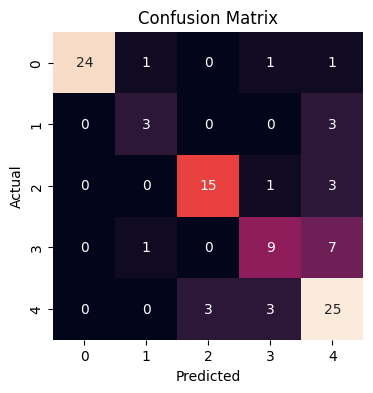

--------------------------------------------------
Support Vector Machine accuracy: 0.56
              precision    recall  f1-score   support

           1       0.69      0.81      0.75        27
           2       0.00      0.00      0.00         6
           3       0.44      0.79      0.57        19
           4       0.00      0.00      0.00        17
           5       0.56      0.61      0.58        31

    accuracy                           0.56       100
   macro avg       0.34      0.44      0.38       100
weighted avg       0.44      0.56      0.49       100



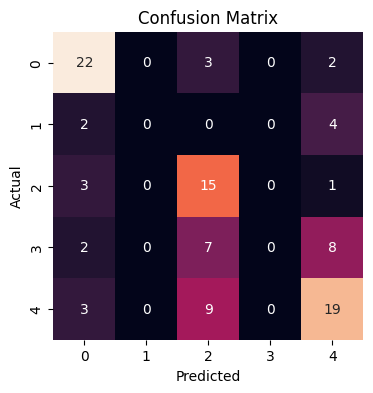

--------------------------------------------------
Ada Boost accuracy: 0.57
              precision    recall  f1-score   support

           1       0.81      0.81      0.81        27
           2       0.00      0.00      0.00         6
           3       0.42      0.58      0.49        19
           4       0.44      0.41      0.42        17
           5       0.61      0.55      0.58        31

    accuracy                           0.57       100
   macro avg       0.46      0.47      0.46       100
weighted avg       0.56      0.57      0.56       100



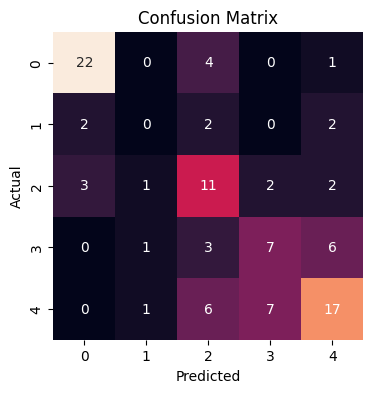

--------------------------------------------------
Gradient Boostng accuracy: 0.65
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        27
           2       0.50      0.17      0.25         6
           3       0.64      0.74      0.68        19
           4       0.44      0.41      0.42        17
           5       0.55      0.58      0.56        31

    accuracy                           0.65       100
   macro avg       0.61      0.56      0.57       100
weighted avg       0.64      0.65      0.64       100



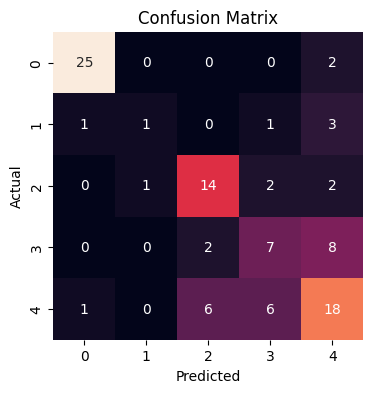

--------------------------------------------------
XGBoost accuracy: 0.66
              precision    recall  f1-score   support

           1       0.92      0.85      0.88        27
           2       0.40      0.33      0.36         6
           3       0.67      0.74      0.70        19
           4       0.54      0.41      0.47        17
           5       0.56      0.65      0.60        31

    accuracy                           0.66       100
   macro avg       0.62      0.60      0.60       100
weighted avg       0.66      0.66      0.66       100



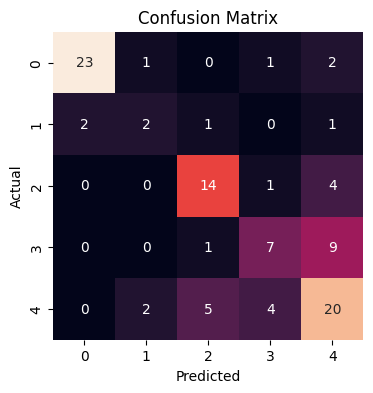

--------------------------------------------------


In [33]:
index = 0
ac = []

for name, model in enumerate(models):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred = label_encoder.inverse_transform(pred)
    accuracy = accuracy_score(y_test, pred)
    ac.append(accuracy)
    cm = confusion_matrix(y_test, pred)
    
    print(f'{names[index]} accuracy: {accuracy}')
    print(classification_report(y_test, pred))
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("-"*50)
    index += 1

## **5. Evaluation**

In [42]:
acc_df = pd.DataFrame({'Model': names, 'Accuracy': ac})
acc_df['Accuracy'] = acc_df['Accuracy']*100
px.bar(acc_df , x= 'Accuracy', y='Model', text_auto = True,  title = 'Model Accuracy', orientation='h', template='plotly_dark')

**RandomForest Model is Best Model**

**Thankyou. Please leave your advice in the comments.**